# Challenge 3

In this challenge we will work on the `Orders` data set. In your work you will apply the thinking process and workflow we showed you in Challenge 2.

You are serving as a Business Intelligence Analyst at the headquarter of an international fashion goods chain store. Your boss today asked you to do two things for her:

**First, identify two groups of customers from the data set.** The first group is **VIP Customers** whose **aggregated expenses** at your global chain stores are **above the 95th percentile** (aka. 0.95 quantile). The second group is **Preferred Customers** whose **aggregated expenses** are **between the 75th and 95th percentile**.

**Second, identify which country has the most of your VIP customers, and which country has the most of your VIP+Preferred Customers combined.**

## Q1: How to identify VIP & Preferred Customers?

We start by importing all the required libraries:

In [1]:
# import required libraries
import numpy as np
import pandas as pd

Next, extract and import `Orders` dataset into a dataframe variable called `orders`. Print the head of `orders` to overview the data:

In [2]:
# your code here
orders = pd.read_csv('orders.csv')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


---

"Identify VIP and Preferred Customers" is the non-technical goal of your boss. You need to translate that goal into technical languages that data analysts use:

## How to label customers whose aggregated `amount_spent` is in a given quantile range?


We break down the main problem into several sub problems:

#### Sub Problem 1: How to aggregate the  `amount_spent` for unique customers?

#### Sub Problem 2: How to select customers whose aggregated `amount_spent` is in a given quantile range?

#### Sub Problem 3: How to label selected customers as "VIP" or "Preferred"?

*Note: If you want to break down the main problem in a different way, please feel free to revise the sub problems above.*

Now in the workspace below, tackle each of the sub problems using the iterative problem solving workflow. Insert cells as necessary to write your codes and explain your steps.

#### Sub Problem 1: How to aggregate the  `amount_spent` for unique customers?

In [3]:
# your code here
# with the line of code below, we group the dataset by 'CustomerID' for operations in individual unique values
# once grouped, we aggregate the amount spent and get the sum by each customer
# pop that into a pandas dataframe
# name it into a new variable 'aggregation'
aggregation = pd.DataFrame(orders.groupby('CustomerID')['amount_spent'].agg(sum))
aggregation

,amount_spent
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,178.05


#### Sub Problem 2: How to select customers whose aggregated `amount_spent` is in a given quantile range?

<Axes: >

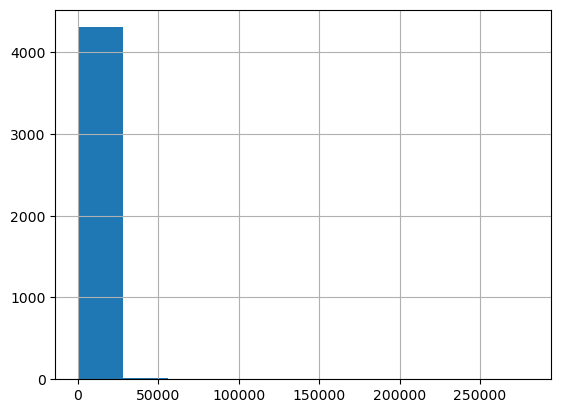

In [4]:
# I use a histogram to quickly understand if the amount spent by customer has a uniform distribution or skewed
# the distribution is positively skewed and this tells me that I need to use pandas qcut rather than cut
aggregation['amount_spent'].hist()

In [5]:
# I make a list of percentile in intervals of 5% 
percentile = ['0%-5%','5%-10%','10%-15%','15%-20%','20%-25%','25%-30%','30%-35%','35%-40%','40%-45%','45%-50%','50%-55%','55%-60%','60%-65%','65%-70%','70%-75%','75%-80%','80%-85%','85%-90%','90%-95%','95%-100%']

# I then use pandas qcut on my aggregation variable into 20 bins and label with the percentile list
# I add this into a new column in aggregation 'Percentile'
aggregation['Percentile'] = pd.qcut(aggregation['amount_spent'],20,labels=percentile)
aggregation

,amount_spent,Percentile
CustomerID,,
12346,77183.60,95%-100%
12347,4310.00,90%-95%
12348,1797.24,75%-80%
12349,1757.55,75%-80%
12350,334.40,25%-30%
...,...,...
18280,180.60,10%-15%
18281,80.82,0%-5%
18282,178.05,10%-15%


#### Sub Problem 3: How to label selected customers as "VIP" or "Preferred"?

In [13]:
# I define a function that labels the customer type by percentile as 'VIP', 'Preferred' and 'Standard'
def make_type(value):
    if value['Percentile'] == '95%-100%':
        return 'VIP Customer'
    elif value['Percentile'] == '90%-95%':
        return 'Preferred Customer'
    elif value['Percentile'] == '85%-90%':
        return 'Preferred Customer'
    elif value['Percentile'] == '80%-85%':
        return 'Preferred Customer'
    elif value['Percentile'] == '75%-80%':
        return 'Preferred Customer'
    else:
        return 'Standard'

In [7]:
# I make a new column in the aggregation dataset 'Customer Group'
# The new column is applied with the function desfined above
aggregation['Customer Group'] = aggregation.apply(make_type, axis=1)
aggregation

,amount_spent,Percentile,Customer Group
CustomerID,,,
12346,77183.60,95%-100%,VIP Customer
12347,4310.00,90%-95%,Preferred Customer
12348,1797.24,75%-80%,Preferred Customer
12349,1757.55,75%-80%,Preferred Customer
12350,334.40,25%-30%,Standard
...,...,...,...
18280,180.60,10%-15%,Standard
18281,80.82,0%-5%,Standard
18282,178.05,10%-15%,Standard


### We now have a dataframe above with customer percentile, and customer group that identifies the VIP and Preferred customers

Now we'll leave it to you to solve Q2 & Q3, which you can leverage from your solution for Q1:

## Q2: How to identify which country has the most VIP Customers?

In [8]:
# your code here
# First I need the countries from my 'Orders' dataframe for the customers
# I get this by merging the datasets columns 'CustomerID' and 'Country' on 'CustomerID'
merged_df = aggregation.merge(orders[['CustomerID', 'Country']], on='CustomerID', how='left')

# This creates duplicates so I use the drop_duplicates method and save it to a new dataset called 'merged_df'
merged_df = merged_df.drop_duplicates(subset=['CustomerID'])
merged_df

,CustomerID,amount_spent,Percentile,Customer Group,Country
0,12346,77183.60,95%-100%,VIP Customer,United Kingdom
1,12347,4310.00,90%-95%,Preferred Customer,Iceland
183,12348,1797.24,75%-80%,Preferred Customer,Finland
214,12349,1757.55,75%-80%,Preferred Customer,Italy
287,12350,334.40,25%-30%,Standard,Norway
...,...,...,...,...,...
397069,18280,180.60,10%-15%,Standard,United Kingdom
397079,18281,80.82,0%-5%,Standard,United Kingdom
397086,18282,178.05,10%-15%,Standard,United Kingdom
397098,18283,2094.88,80%-85%,Preferred Customer,United Kingdom


In [9]:
# I now have a 'Country' column in my dataframe
# I aggregate the customer type for 'VIP' customer and save it to a variable 'vip_list'
vip_list = merged_df[merged_df['Customer Group'] == 'VIP Customer']

In [10]:
# I now check the value_count for the 'Country' column from the aggregated 'VIP' list 
vip_list['Country'].value_counts()

# The country with most VIP customers is United Kingdom

Country
United Kingdom     177
Germany             10
France               9
Switzerland          3
Australia            2
Spain                2
Japan                2
Portugal             2
EIRE                 2
Finland              1
Norway               1
Denmark              1
Cyprus               1
Singapore            1
Netherlands          1
Channel Islands      1
Sweden               1
Name: count, dtype: int64

## Q3: How to identify which country has the most VIP+Preferred Customers combined?

In [11]:
# your code here
# Same method as before but aggregate for both 'VIP' and 'Preferred' customers in the merged dataframe
# Save to a variable
vip_and_preferred = merged_df[(merged_df['Customer Group'] == 'VIP Customer') | (merged_df['Customer Group'] == 'Preferred Customer')]
vip_and_preferred

,CustomerID,amount_spent,Percentile,Customer Group,Country
0,12346,77183.60,95%-100%,VIP Customer,United Kingdom
1,12347,4310.00,90%-95%,Preferred Customer,Iceland
183,12348,1797.24,75%-80%,Preferred Customer,Finland
214,12349,1757.55,75%-80%,Preferred Customer,Italy
304,12352,2506.04,80%-85%,Preferred Customer,Norway
...,...,...,...,...,...
396522,18259,2338.60,80%-85%,Preferred Customer,United Kingdom
396564,18260,2643.20,85%-90%,Preferred Customer,United Kingdom
396858,18272,3078.58,85%-90%,Preferred Customer,United Kingdom
397098,18283,2094.88,80%-85%,Preferred Customer,United Kingdom


In [12]:
# Display the value counts of countries
vip_and_preferred['Country'].value_counts()

# Most VIP and Preferred customer types are in the United Kingdom

Country
United Kingdom     932
Germany             39
France              29
Belgium             11
Switzerland          9
Spain                7
Portugal             7
Norway               7
Italy                5
Finland              5
Channel Islands      4
Australia            4
Japan                4
Cyprus               3
Denmark              3
EIRE                 3
Israel               2
Sweden               2
Singapore            1
Lebanon              1
Poland               1
Iceland              1
Greece               1
Netherlands          1
Austria              1
Canada               1
Malta                1
Name: count, dtype: int64